In [1]:
########################################### Unit 5 | Assignment - The Power of Plots ############################################

######################### Option 2: Pymaceuticals Inc

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "../Datasets/Pymaceuticals/mouse_drug_data.csv"
clinical_trial_data_to_load = "../Datasets/Pymaceuticals/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
clincial_trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_ct = pd.merge(clincial_trial, mouse, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_ct.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [3]:
###########################################Tumor Response to Treatment###################################################

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mouse_drugtime_grouped = mouse_ct.groupby(['Drug', "Timepoint"], as_index=False)
MeanTumorVolume_Grouped = mouse_drugtime_grouped["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
MTV = pd.DataFrame(MeanTumorVolume_Grouped)

# Preview DataFrame
MTV.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
mouse_drugtime_grouped = mouse_ct.groupby(['Drug', "Timepoint"])
SE_grouped = mouse_drugtime_grouped["Tumor Volume (mm3)"].sem().reset_index()

# Convert to DataFrame
SE_TV = pd.DataFrame(SE_grouped)

# Preview DataFrame
SE_TV.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
MTV_reformatted = MTV.pivot_table(index=['Timepoint'], columns=['Drug'])
SE_TV_reformatted = SE_TV.pivot_table(index=['Timepoint'], columns=['Drug'])

# Preview that Reformatting worked
SE_TV_reformatted.head()
MTV_reformatted.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

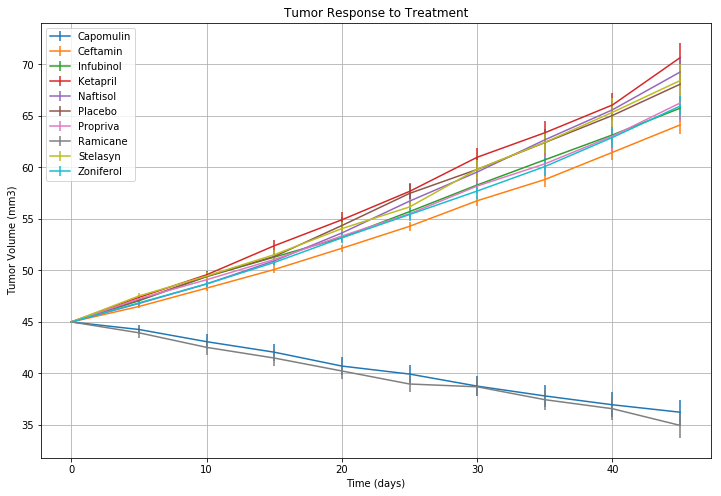

In [7]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, mouse_ct["Timepoint"].max() + 1, 5)

plt.errorbar(x_axis, MTV_reformatted['Tumor Volume (mm3)']['Capomulin'],
             SE_TV_reformatted['Tumor Volume (mm3)']['Capomulin'])
plt.errorbar(x_axis, MTV_reformatted['Tumor Volume (mm3)']['Ceftamin'],
             SE_TV_reformatted['Tumor Volume (mm3)']['Ceftamin'])
plt.errorbar(x_axis, MTV_reformatted['Tumor Volume (mm3)']['Infubinol'],
             SE_TV_reformatted['Tumor Volume (mm3)']['Infubinol'])
plt.errorbar(x_axis, MTV_reformatted['Tumor Volume (mm3)']['Ketapril'],
             SE_TV_reformatted['Tumor Volume (mm3)']['Ketapril'])
plt.errorbar(x_axis, MTV_reformatted['Tumor Volume (mm3)']['Naftisol'],
             SE_TV_reformatted['Tumor Volume (mm3)']['Naftisol'])
plt.errorbar(x_axis, MTV_reformatted['Tumor Volume (mm3)']['Placebo'],
             SE_TV_reformatted['Tumor Volume (mm3)']['Placebo'])
plt.errorbar(x_axis, MTV_reformatted['Tumor Volume (mm3)']['Propriva'],
             SE_TV_reformatted['Tumor Volume (mm3)']['Propriva'])
plt.errorbar(x_axis, MTV_reformatted['Tumor Volume (mm3)']['Ramicane'],
             SE_TV_reformatted['Tumor Volume (mm3)']['Ramicane'])
plt.errorbar(x_axis, MTV_reformatted['Tumor Volume (mm3)']['Stelasyn'],
             SE_TV_reformatted['Tumor Volume (mm3)']['Stelasyn'])
plt.errorbar(x_axis, MTV_reformatted['Tumor Volume (mm3)']['Zoniferol'],
             SE_TV_reformatted['Tumor Volume (mm3)']['Zoniferol'])
plt.grid()
plt.legend(loc='best')
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")

# Save the Figure
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.savefig('TumorVolumeTreatment.png', dpi=100)

# Show the Figure
plt.show()

In [8]:
#########################################Metastatic Response to Treatment#################################################

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
MeanMetaSite_Grouped = mouse_drugtime_grouped["Metastatic Sites"].mean()
MeanMetaSite_Grouped
# Convert to DataFrame
MMS = pd.DataFrame(MeanMetaSite_Grouped)

# Preview DataFrame
MMS.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SE_MetaSite_Grouped = mouse_drugtime_grouped["Metastatic Sites"].sem()

# Convert to DataFrame
SE_MS = pd.DataFrame(SE_MetaSite_Grouped)

# Preview DataFrame
SE_MS.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
MMS_reformatted = MMS.pivot_table(index=['Timepoint'], columns=['Drug'])
SE_MS_reformatted = SE_MS.pivot_table(index=['Timepoint'], columns=['Drug'])

# Preview that Reformatting worked
MMS_reformatted.head()
SE_MS_reformatted.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378

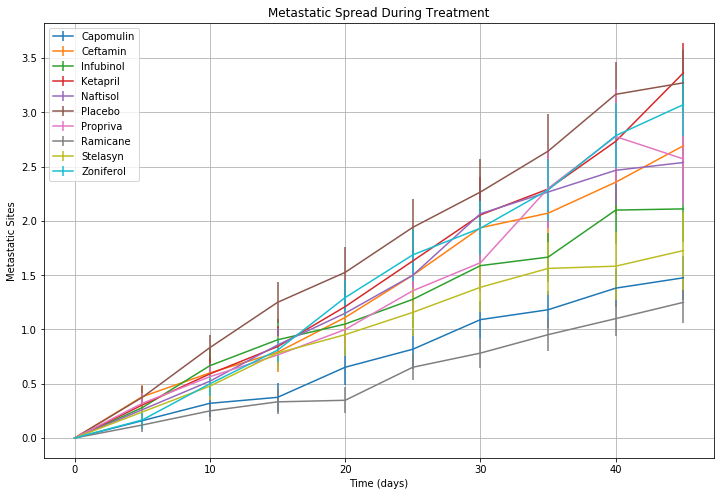

In [12]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, mouse_ct["Timepoint"].max() + 1, 5)

plt.errorbar(x_axis, MMS_reformatted['Metastatic Sites']['Capomulin'],
             SE_MS_reformatted['Metastatic Sites']['Capomulin'])
plt.errorbar(x_axis, MMS_reformatted['Metastatic Sites']['Ceftamin'],
             SE_MS_reformatted['Metastatic Sites']['Ceftamin'])
plt.errorbar(x_axis, MMS_reformatted['Metastatic Sites']['Infubinol'],
             SE_MS_reformatted['Metastatic Sites']['Infubinol'])
plt.errorbar(x_axis, MMS_reformatted['Metastatic Sites']['Ketapril'],
             SE_MS_reformatted['Metastatic Sites']['Ketapril'])
plt.errorbar(x_axis, MMS_reformatted['Metastatic Sites']['Naftisol'],
             SE_MS_reformatted['Metastatic Sites']['Naftisol'])
plt.errorbar(x_axis, MMS_reformatted['Metastatic Sites']['Placebo'],
             SE_MS_reformatted['Metastatic Sites']['Placebo'])
plt.errorbar(x_axis, MMS_reformatted['Metastatic Sites']['Propriva'],
             SE_MS_reformatted['Metastatic Sites']['Propriva'])
plt.errorbar(x_axis, MMS_reformatted['Metastatic Sites']['Ramicane'],
             SE_MS_reformatted['Metastatic Sites']['Ramicane'])
plt.errorbar(x_axis, MMS_reformatted['Metastatic Sites']['Stelasyn'],
             SE_MS_reformatted['Metastatic Sites']['Stelasyn'])
plt.errorbar(x_axis, MMS_reformatted['Metastatic Sites']['Zoniferol'],
             SE_MS_reformatted['Metastatic Sites']['Zoniferol'])

plt.grid()
plt.legend(loc='best')
plt.xlabel("Time (days)")
plt.ylabel("Metastatic Sites")
plt.title("Metastatic Spread During Treatment")

# Save the Figure
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.savefig('MetastaticSpreadTreatment.png', dpi=100)

# Show the Figure
plt.show()

In [13]:
#########################################Survival Rates################################################

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_drugtime_grouped = mouse_ct.groupby(['Drug', "Timepoint"], as_index=False)
mouse_drugetime_grouped_count = mouse_drugtime_grouped['Mouse ID'].count()

# Convert to DataFrame
mouse_drugtime_grouped_df = pd.DataFrame(mouse_drugetime_grouped_count)
mouse_drugtime_grouped_df = mouse_drugtime_grouped_df.rename(columns = {"Mouse ID": "Mouse Count"})

# Preview DataFrame
mouse_drugtime_grouped_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
MouseCount_reformatted = mouse_drugtime_grouped_df.pivot_table(index=['Timepoint'], columns=['Drug'])

# Preview the Data Frame
MouseCount_reformatted.head()

Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       26   
5                  25       21        25       23       23      24       25   
10                 25       20        21       22       21      24       23   
15                 24       19        21       19       21      20       17   
20                 23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

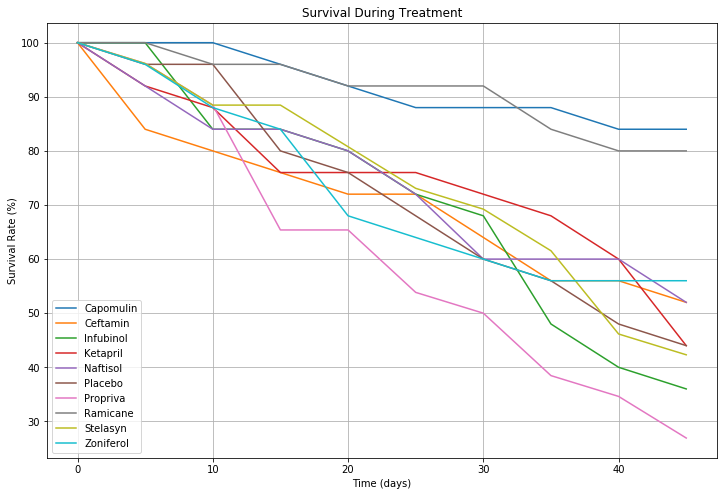

In [16]:
# Generate the Plot (Accounting for percentages)
x_axis = np.arange(0, mouse_ct["Timepoint"].max() + 1, 5)

plt.plot(x_axis, MouseCount_reformatted['Mouse Count']['Capomulin']/MouseCount_reformatted['Mouse Count']['Capomulin'].max()*100)
plt.plot(x_axis, MouseCount_reformatted['Mouse Count']['Ceftamin']/MouseCount_reformatted['Mouse Count']['Ceftamin'].max()*100)
plt.plot(x_axis, MouseCount_reformatted['Mouse Count']['Infubinol']/MouseCount_reformatted['Mouse Count']['Infubinol'].max()*100)
plt.plot(x_axis, MouseCount_reformatted['Mouse Count']['Ketapril']/MouseCount_reformatted['Mouse Count']['Ketapril'].max()*100)
plt.plot(x_axis, MouseCount_reformatted['Mouse Count']['Naftisol']/MouseCount_reformatted['Mouse Count']['Naftisol'].max()*100)
plt.plot(x_axis, MouseCount_reformatted['Mouse Count']['Placebo']/MouseCount_reformatted['Mouse Count']['Placebo'].max()*100)
plt.plot(x_axis, MouseCount_reformatted['Mouse Count']['Propriva']/MouseCount_reformatted['Mouse Count']['Propriva'].max()*100)
plt.plot(x_axis, MouseCount_reformatted['Mouse Count']['Ramicane']/MouseCount_reformatted['Mouse Count']['Ramicane'].max()*100)
plt.plot(x_axis, MouseCount_reformatted['Mouse Count']['Stelasyn']/MouseCount_reformatted['Mouse Count']['Stelasyn'].max()*100)
plt.plot(x_axis, MouseCount_reformatted['Mouse Count']['Zoniferol']/MouseCount_reformatted['Mouse Count']['Zoniferol'].max()*100)

plt.grid()
plt.legend(loc='best')
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")

# Save the Figure
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.savefig('SurvivalRate.png', dpi=100)

# Show the Figure
plt.show()

In [17]:
########################################Summary Bar Graph####################################################

In [18]:
#calculate percent changes for each drug
Capomulin_PC = (MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Capomulin'].iloc[-1] - MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Capomulin'].iloc[0]) / MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Capomulin'].iloc[0] * 100
Ceftamin_PC = (MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Ceftamin'].iloc[-1] - MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Ceftamin'].iloc[0]) / MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Ceftamin'].iloc[0] * 100
Infubinol_PC = (MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Infubinol'].iloc[-1] - MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Infubinol'].iloc[0]) / MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Infubinol'].iloc[0] * 100
Ketapril_PC = (MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Ketapril'].iloc[-1] - MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Ketapril'].iloc[0]) / MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Ketapril'].iloc[0] * 100
Naftisol_PC = (MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Naftisol'].iloc[-1] - MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Naftisol'].iloc[0]) / MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Naftisol'].iloc[0] * 100
Placebo_PC = (MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Placebo'].iloc[-1] - MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Placebo'].iloc[0]) / MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Placebo'].iloc[0] * 100
Propriva_PC = (MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Propriva'].iloc[-1] - MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Propriva'].iloc[0]) / MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Propriva'].iloc[0] * 100
Ramicane_PC = (MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Ramicane'].iloc[-1] - MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Ramicane'].iloc[0]) / MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Ramicane'].iloc[0] * 100
Stelasyn_PC = (MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Stelasyn'].iloc[-1] - MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Stelasyn'].iloc[0]) / MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Stelasyn'].iloc[0] * 100
Zoniferol_PC = (MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Zoniferol'].iloc[-1] - MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Zoniferol'].iloc[0]) / MTV['Tumor Volume (mm3)'][MTV['Drug'] == 'Zoniferol'].iloc[0] * 100

#append percent change and drug name to dictionary
# Drug_PercentChange_Dict = {"Capomulin": Capomulin_PC, "Ceftamin": Ceftamin_PC, "Infubinol": Infubinol_PC,
#                            "Ketapril": Ketapril_PC, "Naftisol": Naftisol_PC, "Placebo": Placebo_PC,
#                            "Propriva": Propriva_PC, "Ramicane": Ramicane_PC, "Stelasyn": Stelasyn_PC,
#                            "Zoniferol": Zoniferol_PC}

Drug_PercentChange_Dict = {"Drug": ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", 
                                    "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], 
                           "Percent Change": [Capomulin_PC, Ceftamin_PC, Infubinol_PC, Ketapril_PC, 
                                              Naftisol_PC, Placebo_PC, Propriva_PC, 
                                              Ramicane_PC, Stelasyn_PC, Zoniferol_PC]}

#convert dictionary to dataframe
Drug_PercentChange_DF = pd.DataFrame(Drug_PercentChange_Dict)
Drug_PercentChange_DF

,Drug,Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


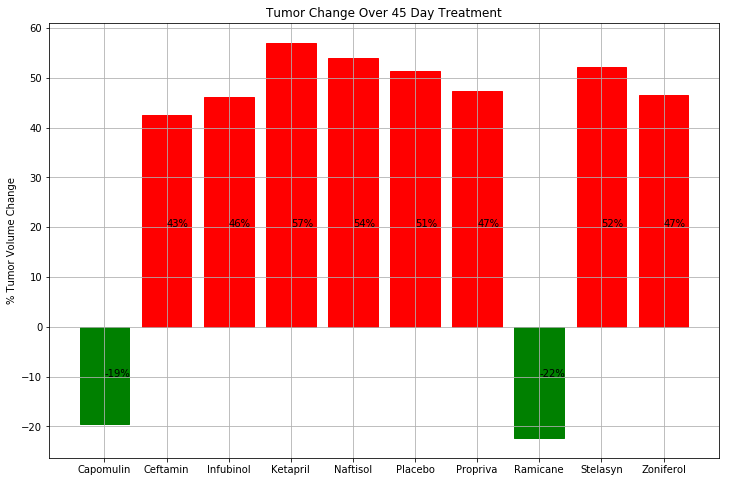

In [19]:
#format percent change variable
# Drug_PercentChange_DF['Percent Change'] = Drug_PercentChange_DF['Percent Change'].map("{:,.0f}%".format)

drug_bar = plt.bar(Drug_PercentChange_DF['Drug'], Drug_PercentChange_DF['Percent Change'])

#change colors of bars
drug_bar[0].set_color('g') 
drug_bar[7].set_color('g') 
for i in range(10):
    if i in (1, 2, 3, 4, 5, 6, 8, 9):
        drug_bar[i].set_color('r') 
        
plt.grid()
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")

#label bars
plt.annotate('-19%', xy=(0, -10))
plt.annotate('43%', xy=(1, 20))
plt.annotate('46%', xy=(2, 20))
plt.annotate('57%', xy=(3, 20))
plt.annotate('54%', xy=(4, 20))
plt.annotate('51%', xy=(5, 20))
plt.annotate('47%', xy=(6, 20))
plt.annotate('-22%', xy=(7, -10))
plt.annotate('52%', xy=(8, 20))
plt.annotate('47%', xy=(9, 20))

# plt.annotate(f"{Drug_PercentChange_DF['Percent Change'][0]}", xy=(0,-10))

# Drug_PercentChange_DF['Percent Change'].map('{:.0f}%'.format)

fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.savefig('TumorChange.png', dpi=100)

#show figure
plt.show()

In [ ]:
########################### 3 Observable Trends ###############################
#1. Only 2 drugs led to a decrease in tumor volume (Capomulin and Ramicane).
#2. Among the 8 drugs that did not help decrease tumor volume, the average % tumor volume increase is about 50.
#3. Propriva yields the sharpest decrease in survival rate.